# AM 1015 - Day 03

In [15]:
graphics_toolkit("gnuplot");


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.


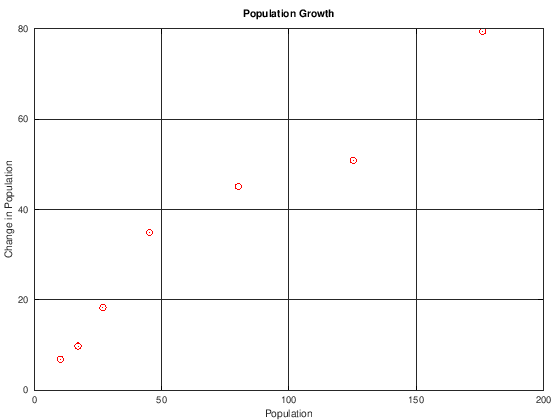

In [17]:
pn = [10.3 17.2 27 45.3 80.2 125.3 176.2 255.6]; % x-axis
dpn = zeros(1,7); % y-axis
for i = 1:7,
    dpn(i) = pn(i+1) - pn(i);
endfor;

new_pn = pn(1:7);

plot(new_pn, dpn, "ro"); % Use pn(1:7) to match the length of dpn
hold on;
xlabel("Population");
ylabel("Change in Population");
title("Population Growth");
grid on;
hold off;

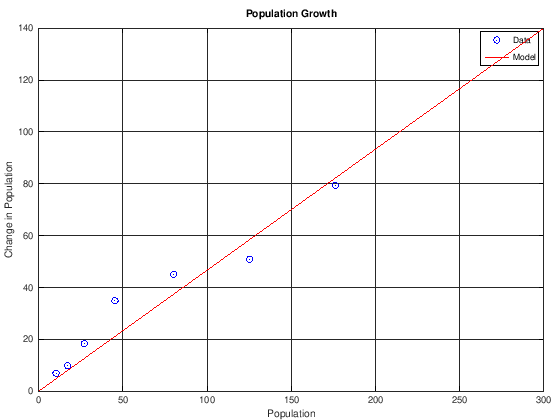

In [21]:
m = sum(new_pn.*dpn)/sum(new_pn.^2);

x = 0:0.5:300;
y = m*x;

plot(new_pn, dpn, 'bo', x, y, 'r-', 'LineWidth', 2);
hold on;
xlabel("Population");
ylabel("Change in Population");
title("Population Growth");
legend('Data', 'Model');
grid on;
hold off;

This model predicts that the population grows by about 50% each time period, which means
the population will grow without bound. This seems unreasonable, so the model needs to
be refined. We’ll discuss such model in the near future.

1. Write down an Octave script to obtain the above model as you have done in the
Activity Sheet 02.

In [98]:
disp(['Fitted Model: Change in Population = ' num2str(m) ' x Population']);

Fitted Model: Change in Population = 0.46663 x Population


2. Starting with p0 = 10.3, use the derive model to predict the population for days 1
through 20.

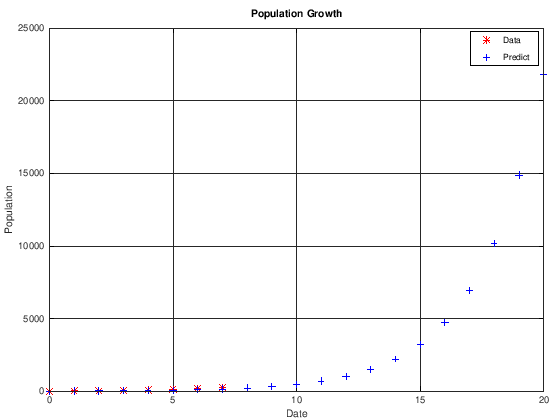

In [23]:
pn_predict = zeros(1,21);
pn_predict(1) = 10.3;
for i = 1:20,
    pn_predict(i+1) = (1+m)*pn_predict(i);
endfor;

n = [0:7]; % first seven days
n_predict = [0:20]; % first 20 days

plot(n, pn, 'r*', n_predict, pn_predict, 'b+');
hold on;
xlabel("Date");
ylabel("Population");
title("Population Growth");
legend('Data', 'Predict');
grid on;
hold off;